In [31]:
import pandas as pd
import numpy as np

In [34]:
ds = pd.read_csv(r"dataset.csv")

In [35]:
ds.head()

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


In [36]:
ds.shape

(47840, 5)

In [37]:
import matplotlib.pyplot as plt

In [38]:
ds.isnull().any()

AT    False
V     False
AP    False
RH    False
PE    False
dtype: bool

In [7]:
import seaborn as sns

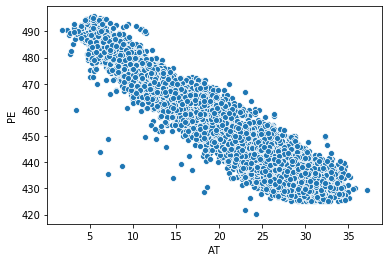

In [30]:
sns.scatterplot(x = "AT",y = "PE" ,data = ds)

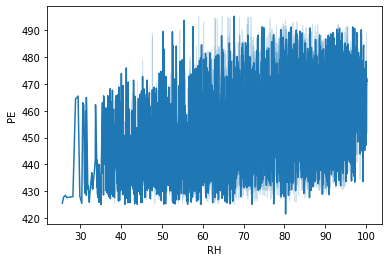

In [9]:
sns.lineplot(x = "RH",y = "PE" ,data = ds)

In [10]:
ds.corr()

,AT,V,AP,RH,PE
AT,1.000000,0.844107,-0.507549,-0.542535,-0.948128
V,0.844107,1.000000,-0.413502,-0.312187,-0.869780
AP,-0.507549,-0.413502,1.000000,0.099574,0.518429
RH,-0.542535,-0.312187,0.099574,1.000000,0.389794
PE,-0.948128,-0.869780,0.518429,0.389794,1.000000


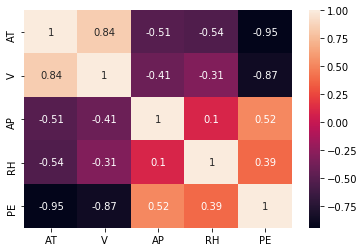

In [16]:
sns.heatmap(ds.corr(),annot = True)

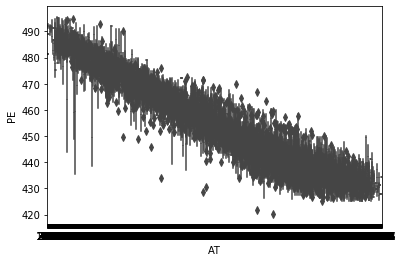

In [17]:
sns.boxplot(x = "AT",y = "PE" ,data = ds)

In [18]:
x = ds.iloc[:,0:4].values 
y = ds.iloc[:,4:5].values

# Multi Linear Regression :

In [39]:
from sklearn.metrics import r2_score

In [40]:
from sklearn.linear_model import LinearRegression


In [41]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2 , random_state = 0)

In [42]:
mlr = LinearRegression()

In [43]:
x_train.shape

(7654, 4)

In [25]:
y_train.shape

(7654, 1)

In [26]:
x_test.shape

(1914, 4)

In [27]:
mlr.fit(x_train,y_train)
pred = mlr.predict(x_test)

In [28]:
accr = r2_score(y_test,pred)

In [29]:
accr

0.924894899672575

Multi Linear Accuracy = 92.5%

# now lets try via ANN

In [42]:
import keras
from keras.layers import Dense
from keras.models import Sequential

Using TensorFlow backend.
/Users/satyamsingh/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/satyamsingh/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/satyamsingh/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/satyamsingh/opt/ana

In [43]:
model = Sequential()

In [44]:
model.add(Dense(units = 6,init = "random_uniform", activation = "relu"))

#this is input layer, only one i/p layeer

/Users/satyamsingh/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=6, activation="relu", kernel_initializer="random_uniform")`
  """Entry point for launching an IPython kernel.


In [45]:
model.add(Dense(units = 12,init = "random_uniform", activation = "relu"))

#this is hidden layer 1 , multiple hidden layer poss

/Users/satyamsingh/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=12, activation="relu", kernel_initializer="random_uniform")`
  """Entry point for launching an IPython kernel.


In [46]:
model.add(Dense(units = 24,init = "random_uniform", activation = "relu"))

#this is hidden layer 2 , multiple hidden layer poss

/Users/satyamsingh/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=24, activation="relu", kernel_initializer="random_uniform")`
  """Entry point for launching an IPython kernel.


In [47]:
model.add(Dense(units = 48,init = "random_uniform", activation = "relu"))

#this is hidden layer 3 , multiple hidden layer poss

/Users/satyamsingh/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=48, activation="relu", kernel_initializer="random_uniform")`
  """Entry point for launching an IPython kernel.


In [48]:
model.add(Dense(units = 1,init = "random_uniform", activation = "relu"))

#this is o/p layer, only one o/p layer
#can leave empty also, activation

/Users/satyamsingh/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=1, activation="relu", kernel_initializer="random_uniform")`
  """Entry point for launching an IPython kernel.


In [49]:
#model.compile(optimizer = "adam", loss = "mean_squared_error", metrics =["r2_score"])
model.compile(loss='mse', optimizer='adam', metrics=['mse'])

In [50]:
x_train.shape

(7654, 4)

In [66]:
model.fit(x_train,y_train,batch_size = 32, epochs = 150)

Epoch 1/150
7654/7654 [==============================] - 1s 90us/step - loss: 30.1251 - mean_squared_error: 30.1251
Epoch 2/150
7654/7654 [==============================] - 1s 82us/step - loss: 29.9798 - mean_squared_error: 29.9798
Epoch 3/150
7654/7654 [==============================] - 1s 80us/step - loss: 28.9739 - mean_squared_error: 28.9739
Epoch 4/150
7654/7654 [==============================] - 1s 80us/step - loss: 29.9120 - mean_squared_error: 29.9120
Epoch 5/150
7654/7654 [==============================] - 1s 81us/step - loss: 30.1399 - mean_squared_error: 30.1399
Epoch 6/150
7654/7654 [==============================] - 1s 104us/step - loss: 28.5674 - mean_squared_error: 28.5674
Epoch 7/150
7654/7654 [==============================] - 1s 119us/step - loss: 29.0996 - mean_squared_error: 29.0996
Epoch 8/150
7654/7654 [==============================] - 1s 128us/step - loss: 27.7277 - mean_squared_error: 27.7277
Epoch 9/150
7654/7654 [==============================] - 1s 99us/step

7654/7654 [==============================] - 1s 99us/step - loss: 28.3389 - mean_squared_error: 28.3389
Epoch 140/150
7654/7654 [==============================] - 1s 98us/step - loss: 27.9232 - mean_squared_error: 27.9232
Epoch 141/150
7654/7654 [==============================] - 1s 98us/step - loss: 28.7880 - mean_squared_error: 28.7880
Epoch 142/150
7654/7654 [==============================] - 1s 98us/step - loss: 28.8398 - mean_squared_error: 28.8398
Epoch 143/150
7654/7654 [==============================] - 1s 98us/step - loss: 26.9001 - mean_squared_error: 26.9001
Epoch 144/150
7654/7654 [==============================] - 1s 99us/step - loss: 28.6177 - mean_squared_error: 28.6177
Epoch 145/150
7654/7654 [==============================] - 1s 97us/step - loss: 27.9596 - mean_squared_error: 27.9596
Epoch 146/150
7654/7654 [==============================] - 1s 98us/step - loss: 27.9435 - mean_squared_error: 27.9435
Epoch 147/150
7654/7654 [==============================] - 1s 99us/ste

In [67]:
y_pred = model.predict(x_test)

In [68]:
acc = r2_score(y_pred, y_test)
acc

0.9053116228235427